# Exercise 2.3
Consider the Bernoulli model X1, . . . , Xn
iid∼ Bernoulli(θ), θ ∈ Θ = (0, 1).

You should produce a plot with θ ∈ (0, 1) on the horizontal axis and Pθ(θ ∈ CIα) on the vertical axis. Also add a horizontal line indicating the nominal 1 − α level.

What do you observe? Should that worry us? Can you fix it?

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

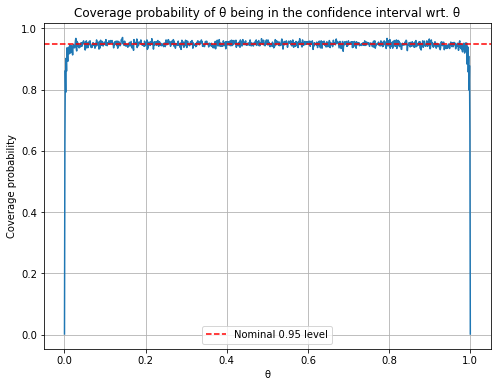

In [114]:
α = 0.05
n = 1000
num_of_simulations = 1000

Θ = np.linspace(1e-6, 1 - 1e-6, 1000)
Θ_between = np.zeros(1000)

for _ in range(num_of_simulations):
    X = np.array([np.random.choice([0, 1], size=n, p=[1 - θ, θ]) for θ in Θ])
    Θ_n = np.mean(X, axis=1)
    S = np.sqrt(Θ_n*(1-Θ_n))
    q = stats.norm.ppf(1-α/2)
    CI_l = Θ_n - q/np.sqrt(n)*S
    CI_u = Θ_n + q/np.sqrt(n)*S
    Θ_between += ((Θ >= CI_l) & (Θ <= CI_u))
Θ_prob = Θ_between/num_of_simulations
    
plt.figure(figsize=(8, 6))
plt.plot(Θ, Θ_prob)
plt.title(f'Coverage probability of θ being in the confidence interval wrt. θ')
plt.xlabel('θ')
plt.ylabel('Coverage probability')
plt.axhline(y=1-α, color='r', linestyle='--', label=f'Nominal {1-α} level')
plt.grid(True)
plt.legend()
plt.show()


The simulation consistently provides a good approximation of the nominal level, except for instances where the values are near the endpoints:
0 and 1.

This anomaly occurs because, in such cases, a significant portion of the simulation results in values of either 0 or 1, leading to a standard error of 0, so the parameter fails to fall within the confidence interval.

To mitigate this issue, increasing the sample size can improve the situation by reducing the likelihood of all values being the same.